<a href="https://colab.research.google.com/github/Dazai13/DaData/blob/main/%D0%9B%D0%B0%D0%B7%D0%B0%D1%80%D0%B5%D0%B2_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1
\
ример 1: Y = 3X + 1


--- Обучение с активацией: linear ---
Loss: 0.00561, Prediction (X=10): 30.626

--- Обучение с активацией: relu ---
Loss: 0.67089, Prediction (X=10): 30.688

--- Обучение с активацией: sigmoid ---
Loss: 46.81036, Prediction (X=10): 1.000

--- Обучение с активацией: tanh ---
Loss: 45.79953, Prediction (X=10): 1.000


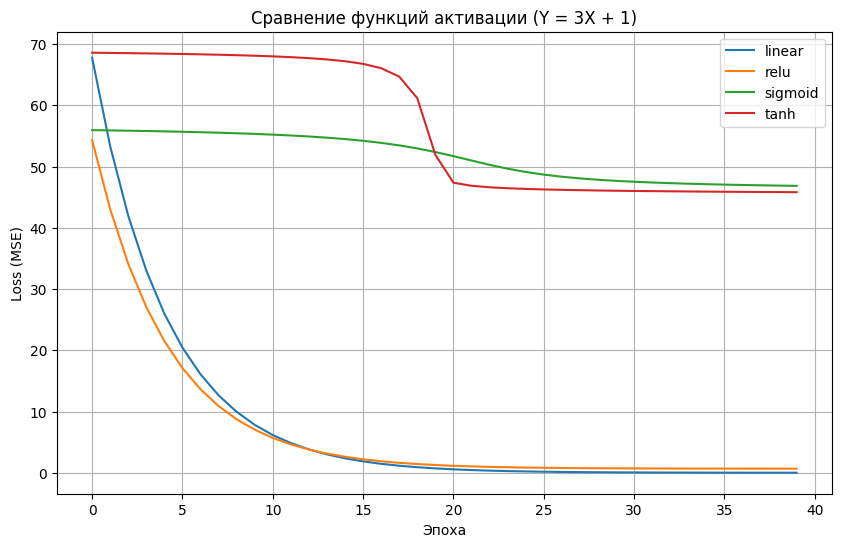

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Данные — обязательно как NumPy массивы
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

# Функции активации
activations = {
    'linear': 'linear',
    'relu': 'relu',
    'sigmoid': 'sigmoid',
    'tanh': 'tanh'
}

results = {}

for name, act in activations.items():
    print(f"\n--- Обучение с активацией: {name} ---")

    # Используем Input для явного указания формы входа (рекомендуется)
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1,)),  # вместо input_shape=[1]
        tf.keras.layers.Dense(units=1, activation=act)
    ])

    model.compile(optimizer='sgd', loss='mean_squared_error')
    history = model.fit(xs, ys, epochs=40, verbose=0)
    loss = model.evaluate(xs, ys, verbose=0)

    # ВАЖНО: вход для predict — тоже NumPy-массив!
    pred = model.predict(np.array([10.0]), verbose=0)[0][0]

    results[name] = {
        'loss': loss,
        'prediction': pred,
        'history': history.history['loss']
    }
    print(f"Loss: {loss:.5f}, Prediction (X=10): {pred:.3f}")

# Визуализация
plt.figure(figsize=(10, 6))
for name, res in results.items():
    plt.plot(res['history'], label=name)
plt.title('Сравнение функций активации (Y = 3X + 1)')
plt.xlabel('Эпоха')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Пример 2: Y = 2X


--- Нейронов: 5 ---
Финальный loss: 15.90800

--- Нейронов: 10 ---
Финальный loss: 8.43974

--- Нейронов: 20 ---
Финальный loss: 3.62034

--- Нейронов: 30 ---
Финальный loss: 2.58913

--- Нейронов: 50 ---
Финальный loss: 1.85218


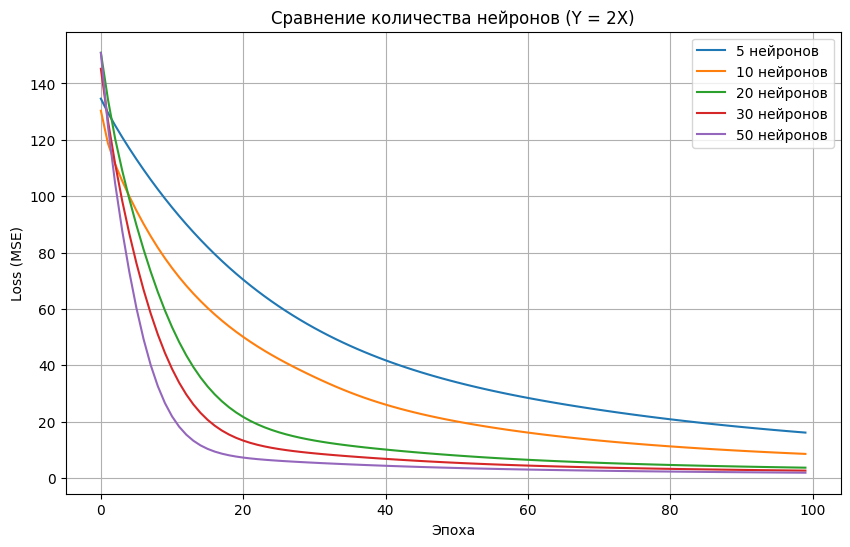

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
xs = np.linspace(-10, 10, 21, dtype=float)
ys = 2 * xs

neuron_counts = [5, 10, 20, 30, 50]  # разное количество нейронов
results = {}

for n in neuron_counts:
    print(f"\n--- Нейронов: {n} ---")
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(n, input_dim=1, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    history = model.fit(xs, ys, epochs=100, verbose=0)
    loss = model.evaluate(xs, ys, verbose=0)
    results[n] = {
        'loss': loss,
        'history': history.history['loss']
    }
    print(f"Финальный loss: {loss:.5f}")

# Визуализация
plt.figure(figsize=(10, 6))
for n, res in results.items():
    plt.plot(res['history'], label=f'{n} нейронов')
plt.title('Сравнение количества нейронов (Y = 2X)')
plt.xlabel('Эпоха')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Пример 3: Y = sin(X)


--- Нейронов: 10 ---
Финальный loss: 0.008225

--- Нейронов: 20 ---
Финальный loss: 0.007724

--- Нейронов: 30 ---
Финальный loss: 0.008608

--- Нейронов: 50 ---
Финальный loss: 0.007757

--- Нейронов: 80 ---
Финальный loss: 0.008612


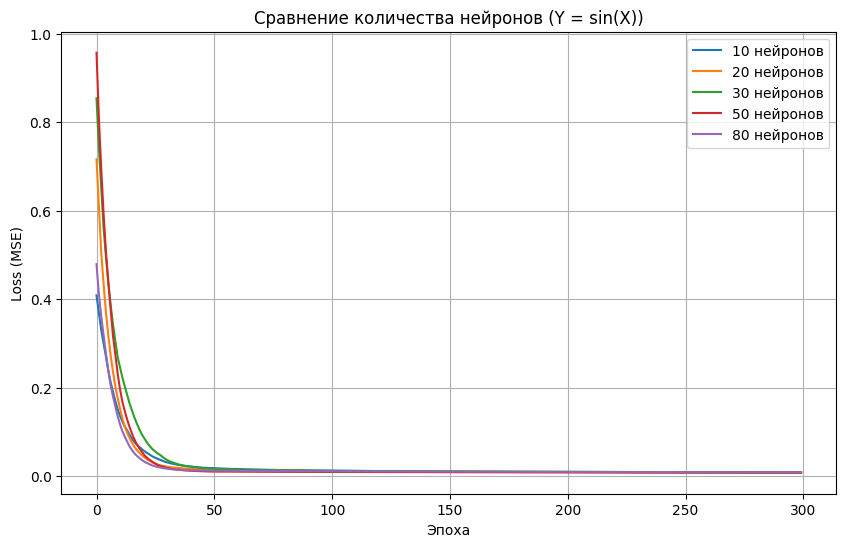

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

# Генерация данных
xs = np.arange(-2, 2, 0.1, dtype=float)
ys = np.array([math.sin(x) for x in xs])

neuron_counts = [10, 20, 30, 50, 80]
results = {}

for n in neuron_counts:
    print(f"\n--- Нейронов: {n} ---")
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(n, input_dim=1, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    history = model.fit(xs, ys, epochs=300, verbose=0)
    loss = model.evaluate(xs, ys, verbose=0)
    results[n] = {
        'loss': loss,
        'history': history.history['loss']
    }
    print(f"Финальный loss: {loss:.6f}")

# Визуализация
plt.figure(figsize=(10, 6))
for n, res in results.items():
    plt.plot(res['history'], label=f'{n} нейронов')
plt.title('Сравнение количества нейронов (Y = sin(X))')
plt.xlabel('Эпоха')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Пример 4: Y = (K + X) × X


--- Активация: sigmoid ---
Loss: 62.04669

--- Активация: relu ---
Loss: 74.65314

--- Активация: tanh ---
Loss: 89.77116


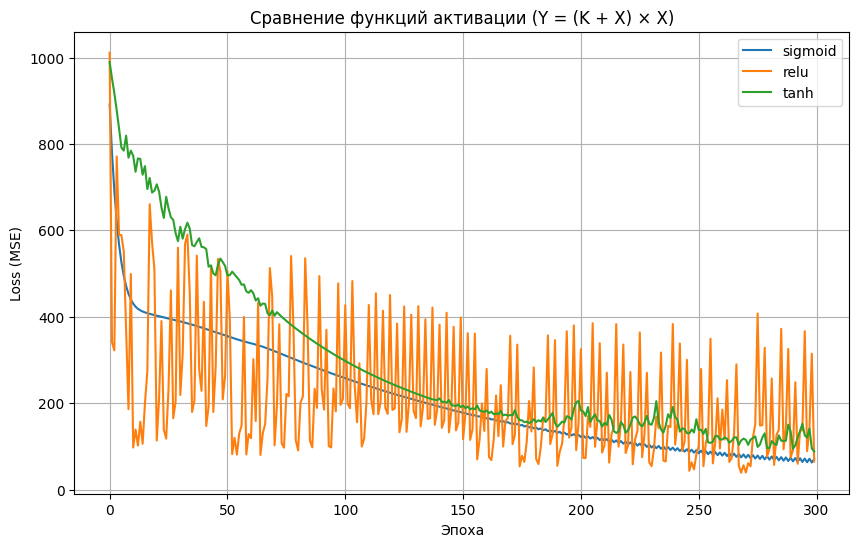

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Данные
xs = np.array([-5.9, -5.1, -4.9, -4.1, -3.9, -3.1, -2.9, -2.1, -1.9, -0.1,
               0.9, 0.1, 1.9, 1.1, 2.9, 2.1, 3.9, 3.1, 4.9, 4.1, 5.9], dtype=float)
ks = np.array([-5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.0, -0.5,
               0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype=float)
ys = (ks + xs) * xs

# Объединяем входы
inputs = np.column_stack((xs, ks))

# Функции активации
activations = {
    'sigmoid': 'sigmoid',
    'relu': 'relu',
    'tanh': 'tanh'
}

results = {}

for name, act in activations.items():
    print(f"\n--- Активация: {name} ---")
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(20, input_dim=2, activation=act),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    history = model.fit(inputs, ys, epochs=300, verbose=0)
    loss = model.evaluate(inputs, ys, verbose=0)
    results[name] = {
        'loss': loss,
        'history': history.history['loss']
    }
    print(f"Loss: {loss:.5f}")

# Визуализация
plt.figure(figsize=(10, 6))
for name, res in results.items():
    plt.plot(res['history'], label=name)
plt.title('Сравнение функций активации (Y = (K + X) × X)')
plt.xlabel('Эпоха')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()